# MODEL TO COUNT INSTANCES AN IMAGE

#### by Ivan Alfredo Rodrigo

L'objectiu d'aquesta pràctica es entrenar un Machine Learning Model el qual pugue contar les aparacions de objectes en imatges. 

In [1]:
# some imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
# a partir d'ara les imatges seran mes petites per tal de tenir codi mes ben ordenat
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (8, 4))

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## With a Neural Network
import tensorflow as tf
from tensorflow import keras

# pip install keras
from functools import partial
from keras.models import Sequential
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

/tmp/ipykernel_4235/1150152661.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


2024-07-17 11:44:12.182977: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-17 11:44:12.932847: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-17 11:44:14.350300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 11:44:14.485189: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 11:44:14.522609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 11:44:14.809053: I tensorflow/core/platform/cpu_feature_gu

## DEFINICIÓ DEL DATA SET

In [2]:
train_txt_folder = 'train.txt'
train_folder = 'train/train/train'
test_folder = 'test/test/test'

df_train = pd.read_csv('train.txt',sep=' ',header=None)

In [3]:
with open(train_txt_folder) as f:
    lines = f.readlines()

In [4]:
X_train_full = list()
y_train_full = list()
for line in lines:
    image_path, label = line.split(' ')
    image = load_img('train/train/'+image_path[1:], color_mode = "grayscale")
    data = img_to_array(image) / 255.0
    X_train_full.append(data)
    y_train_full.append(float(label))

In [5]:
X_test = list()
folder = test_folder
folder_list = os.listdir(folder)
folder_list.sort()
for filename in folder_list:
    image = load_img(os.path.join(folder,filename),  color_mode = "grayscale")
    data = img_to_array(image)/ 255.0
    X_test.append(data)

In [6]:
X_train_full = np.array(X_train_full)
y_train_full = np.array(y_train_full)
X_test = np.array(X_test)

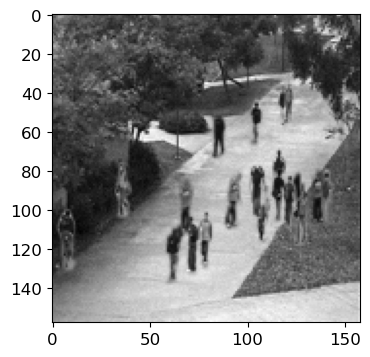

In [7]:
plt.imshow(X_train_full[0], cmap = 'gray')
plt.show()

In [8]:
X_train, X_valid, y_train, y_valid= train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=66)

In [9]:
print("L0 tamany de cada imatge del dataset és: ", X_train[0].shape)
print("Per tant cada imatge té ", X_train[0].shape[0] * X_train[0].shape[1], " pixels")

L0 tamany de cada imatge del dataset és:  (158, 158, 1)
Per tant cada imatge té  24964  pixels


In [13]:
del X_train_full
del y_train_full

## ESTUDI DEL  DATASET

                  0
count  10050.000000
mean      14.392935
std        8.655923
min        0.000000
25%        7.000000
50%       14.000000
75%       22.000000
max       29.000000


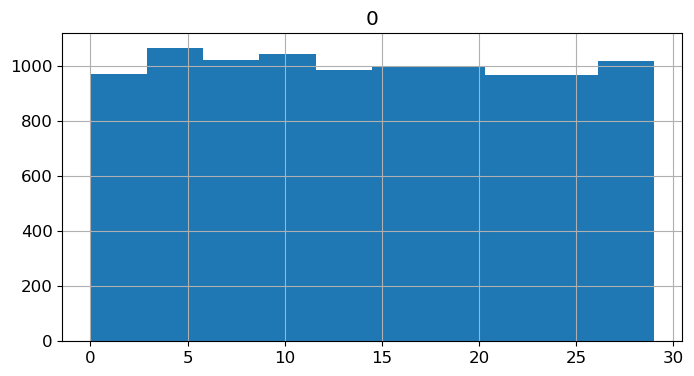

In [10]:
df = pd.DataFrame(y_train)
df.hist()
print(df.describe())

## CREACIÓ DEL Convolutional Neural Network, CNN  MODEL

In [11]:
base_model=Sequential()
base_model.add(BatchNormalization(input_shape = (158,158,1)))
base_model.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu',padding='same', input_shape = (158, 158, 1))) 
base_model.add(MaxPooling2D(pool_size=2))
base_model.add(Convolution2D(filters=6,kernel_size=4,padding='same',activation='relu'))
base_model.add(MaxPooling2D(pool_size=2))
base_model.add(Convolution2D(filters=128,kernel_size=3,padding='same',activation='relu'))
base_model.add(MaxPooling2D(pool_size=2))
base_model.add(Convolution2D(filters=128,kernel_size=2,padding='same',activation='relu'))
base_model.add(MaxPooling2D(pool_size=2))
base_model.add(Flatten()) 
base_model.add(Dense(units=128,activation = 'relu'))
base_model.add(Dense(units = 64, activation = 'relu'))
base_model.add(Dense(units = 32, activation = 'relu'))
base_model.add(Dense(units = 16, activation = 'relu'))

/home/ivan/.local/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/ivan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Les imatges que tenen característiques paregudes tindran com output resultats semblants.
Per tant ya no classifiquem si no que entrenem model per a que a la hora de avaluar nova imatge trobi la que tingue caracteristiques mes semblants i ajusti la solució lo millor possible.

In [14]:
base_model.add(Dense(units = 1, activation = 'linear'))

checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_baseline.keras", save_best_only=True)

# define loss function, optimizer and metrics
base_model.compile(loss="mean_squared_error",
              optimizer="adam")

base_model.summary()

base_model.evaluate(X_valid, y_valid,verbose=2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 158, 158, 1)    │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 158, 158, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 79, 79, 6)      │         3,078 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 39, 39, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 39, 39, 128)    │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,414,221 (5.39 MB)

 Trainable params: 1,414,219 (5.39 MB)

 Non-trainable params: 2 (8.00 B)

2024-07-17 11:52:57.475617: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 494287200 exceeds 10% of free system memory.
2024-07-17 11:52:58.063144: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102252544 exceeds 10% of free system memory.
2024-07-17 11:52:58.301732: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102252544 exceeds 10% of free system memory.
2024-07-17 11:52:58.471249: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102252544 exceeds 10% of free system memory.
2024-07-17 11:52:58.646446: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102252544 exceeds 10% of free system memory.


155/155 - 28s - 182ms/step - loss: 280.6677


280.66766357421875

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 311s 976ms/step - loss: 54.5833 - val_loss: 48.2644
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 310s 985ms/step - loss: 4.5652 - val_loss: 6.9418
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - loss: 3.3696 - val_loss: 2.7780
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - loss: 3.4549 - val_loss: 5.0489
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - loss: 2.5485 - val_loss: 2.1869
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - loss: 2.4608 - val_loss: 5.9143
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - loss: 2.3048 - val_loss: 4.6592
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - loss: 2.3676 - val_loss: 6.9128
Epoch 9/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - loss: 2.7274 - val_loss: 8.1909
Epoch 10/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - loss: 1.9674 - val_loss: 2.1160
Epoch 11/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - loss: 1.5276 - val_loss: 1.6118
Epoch 12/20
315/315 ━━━━━━━━━━━━━

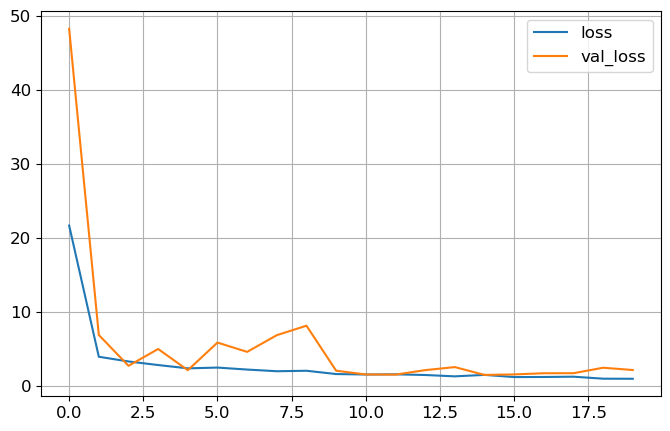

In [15]:
history = base_model.fit(X_train, y_train, epochs=20, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb])
                        
# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

## intent de MILLORA DEL MODEL

Usar una CNN definida per nosaltres és molt costos i no sabem si del tot eficient. Desconeixem quins parametres com número de capes, tamany de convolució, forma de las capes... son mes importants i a quins els hi hem de donar més pes o menys.

Es un procés molt lent estar: avaluant -> entrenant -> modificant al model per arribar a un bon resultat.

Per esta raó, intentarem usar un model ja predefinit que permet tindre una red Convolucional amb forma ja feta i entrenada amb paràmtres de reconeixement d'imatges: 
    <b>Resnet50<b>
    
Ara bé, aquest model espera 3 canals (RGB) i les nostres imatges estàn en escala de grisos, així que haurem de modificar varies coses.

In [ ]:
from tensorflow.keras.applications import resnet50

resnet_model = resnet50.ResNet50(
    # Load pretrained model
    weights='imagenet',
    # Set input shape
    input_shape=(158,158,3),
    # We need to modify the fully connected layers in order to setup for a regression problem
    include_top=False,
    pooling='avg'  # A global average pooling layer will be added after the last convolutional block.
)

In [ ]:
resnet_model.summary()

Però s'ha de crear capes per controlar el overfitting aixi que...

In [ ]:
fully_c1 = Dense(128, activation='relu')(resnet_model.output)
drop = Dropout(0.001)(fully_c1)
fully_c2 = Dense(32, activation='relu')(drop)
final = Dense(1, activation='linear')(fully_c2)

model_50 = keras.models.Model(inputs=resnet_model.input, outputs=final)
del resnet_model

In [ ]:
model_50.summary()

In [ ]:
optimizer = keras.optimizers.Adam(
    # Adjusting the learning rate could be one parameter to play with
    learning_rate=0.001,
)

model_50.compile(
    optimizer=optimizer, 
    loss="mean_squared_error",
    metrics=['mean_absolute_error', 'mean_squared_error']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_res50", save_best_only=True)

In [ ]:
del model_50

No tenim prou temps per veure els resultats d'aquest model, té molts paràmtres i com major es el número, més costa entrenar i avaluar, per tant olvidarem aquesta opció. Seguirem amb l'anterior, la idea es augmentar-lo per fer-lo més precís.

##  MODEL FINAL

In [36]:
model=Sequential()
model.add(BatchNormalization(input_shape = (158,158,1)))
model.add(Convolution2D(filters = 32, kernel_size = 3,padding='same',activation ='relu', input_shape = (158, 158, 1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=6,kernel_size=4,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten()) 
model.add(Dense(units=128,activation = 'relu'))
model.add(Dropout(0.001))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))

model.add(Dense(units = 1, activation = 'linear'))

checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.keras", save_best_only=True)


optimizer = keras.optimizers.Adam(
    # Adjusting the learning rate could be one parameter to play with
    learning_rate=0.001,
)
# define loss function, optimizer and metrics
model.compile(loss="mean_squared_error",
              optimizer=optimizer)

model.summary()

base_model.evaluate(X_valid, y_valid,verbose=2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 158, 158, 1)    │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 158, 158, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 79, 79, 6)      │         3,078 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 39, 39, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 39, 39, 128)    │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 19, 19, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,414,219 (5.39 MB)

 Trainable params: 1,414,217 (5.39 MB)

 Non-trainable params: 2 (8.00 B)

155/155 - 28s - 183ms/step - loss: 2.2109


2.2109336853027344

In [ ]:
BS = 32
EPOCHS = 100
history = model.fit(
    #generator = train_iterator,
    X_train, y_train,
    validation_data= (X_valid, y_valid),
    steps_per_epoch=len(X_train) // BS,
    epochs=EPOCHS,
    callbacks=[checkpoint_cb])

In [38]:
y_pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step


In [39]:
df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','prediction']

df_output.to_csv('kaggle_model.csv',index=False)